Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = churn ~ line_stat + bandwidth + complaint_cnt + 
    with_phone_service + tenure_Cat + secured_revenue + ce_expiry + 
    current_mth_churn, family = binomial(link = "logit"), data = training)

Coefficients: (2 not defined because of singularities)
                           Estimate Std. Error  z value Pr(>|z|)    
(Intercept)              -4.495e+01  2.401e+03   -0.019 0.985063    
line_statCN               1.231e+01  7.735e+01    0.159 0.873590    
line_statIS              -5.057e+00  1.151e-01  -43.943  < 2e-16 ***
bandwidth100M             1.897e+00  1.186e-01   15.995  < 2e-16 ***
bandwidth100M (FTTO)      1.951e+00  1.220e-01   15.993  < 2e-16 ***
bandwidth10M              1.950e+00  1.247e-01   15.639  < 2e-16 ***
bandwidth300M (FTTO)      1.647e+00  1.724e-01    9.551  < 2e-16 ***
bandwidth30M              1.989e+00  1.253e-01   15.876  < 2e-16 ***
bandwidth500M (FTTO)      1.870e+00  2.141e-01    8.733  < 2e-16 ***
bandwidth50M              1.813e+00  2.6

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] "Logistic Regression Model Accuracy is 0.949298309943665"
[1] "The Confusion Matrix of Decision Tree is"


         Actual
Predicted     0     1
        N 23131  6868
        Y     0     0

[1] "The Decision Tree Accuracy is 0.771059035301177"
[1] "The Confusion Matrix of Naive Bayes is"


         Actual
Predicted     0     1
        N 23131  6551
        Y     0   317

[1] "The Naive Bayes Accuracy is 0.781626054201807"

Call:
 randomForest(formula = churn ~ line_stat + bandwidth + complaint_cnt +      with_phone_service + tenure_Cat + secured_revenue + ce_expiry +      current_mth_churn, data = training) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 1.39%
Confusion matrix:
      N     Y class.error
N 53111   864 0.016007411
Y   109 15917 0.006801448


         Actual
Predicted     0     1
        N 22695    46
        Y   436  6822

[1] "The Random Forest Accuracy is 0.983932797759925"


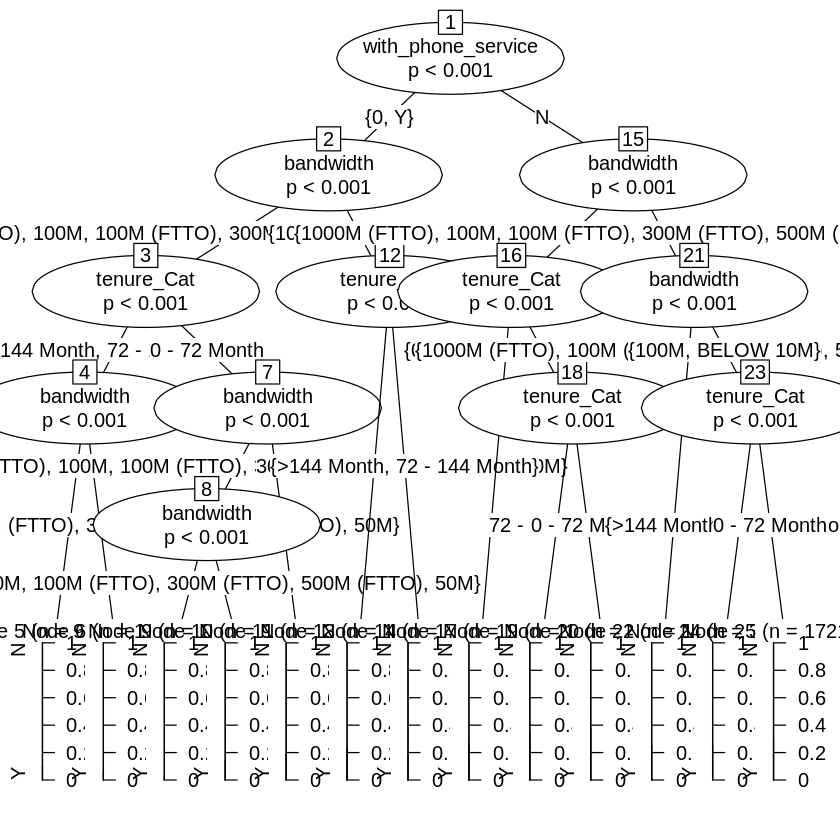

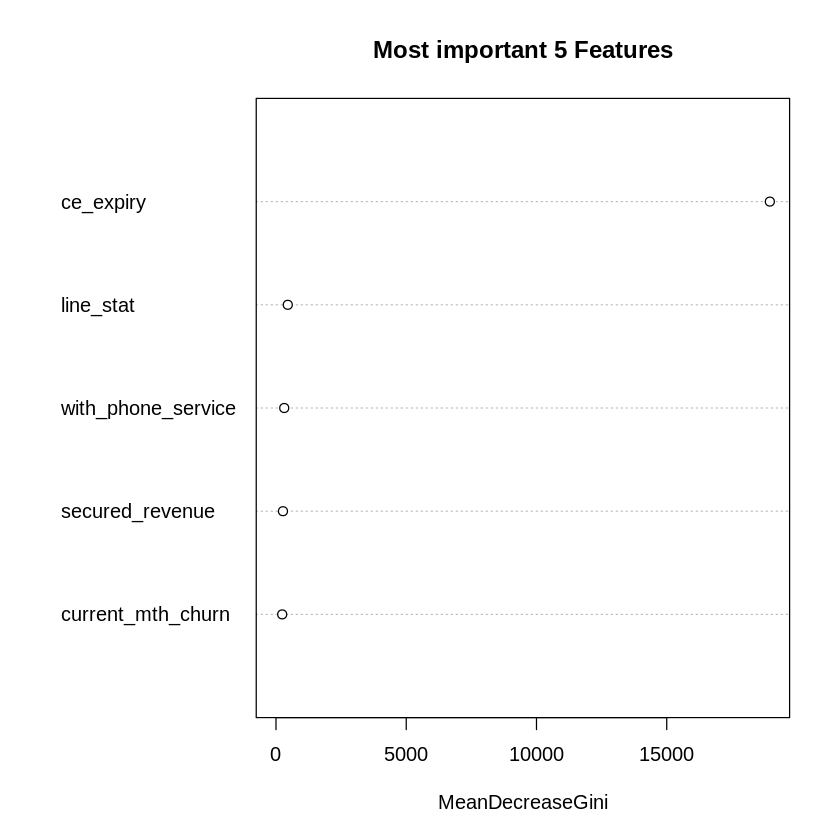

,Frequency,Percent,Cum. percent
Y,45788,50,50
N,45788,50,100
Total,91576,100,100


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = churn ~ line_stat + bandwidth + complaint_cnt + 
    with_phone_service + tenure_Cat + secured_revenue + ce_expiry + 
    current_mth_churn, family = binomial(link = "logit"), data = training)

Coefficients: (2 not defined because of singularities)
                           Estimate Std. Error  z value Pr(>|z|)    
(Intercept)              -4.495e+01  2.401e+03   -0.019 0.985063    
line_statCN               1.231e+01  7.735e+01    0.159 0.873590    
line_statIS              -5.057e+00  1.151e-01  -43.943  < 2e-16 ***
bandwidth100M             1.897e+00  1.186e-01   15.995  < 2e-16 ***
bandwidth100M (FTTO)      1.951e+00  1.220e-01   15.993  < 2e-16 ***
bandwidth10M              1.950e+00  1.247e-01   15.639  < 2e-16 ***
bandwidth300M (FTTO)      1.647e+00  1.724e-01    9.551  < 2e-16 ***
bandwidth30M              1.989e+00  1.253e-01   15.876  < 2e-16 ***
bandwidth500M (FTTO)      1.870e+00  2.141e-01    8.733  < 2e-16 ***
bandwidth50M              1.813e+00  2.6

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] "Logistic Regression Model Accuracy after balance is 0.944598136284217"


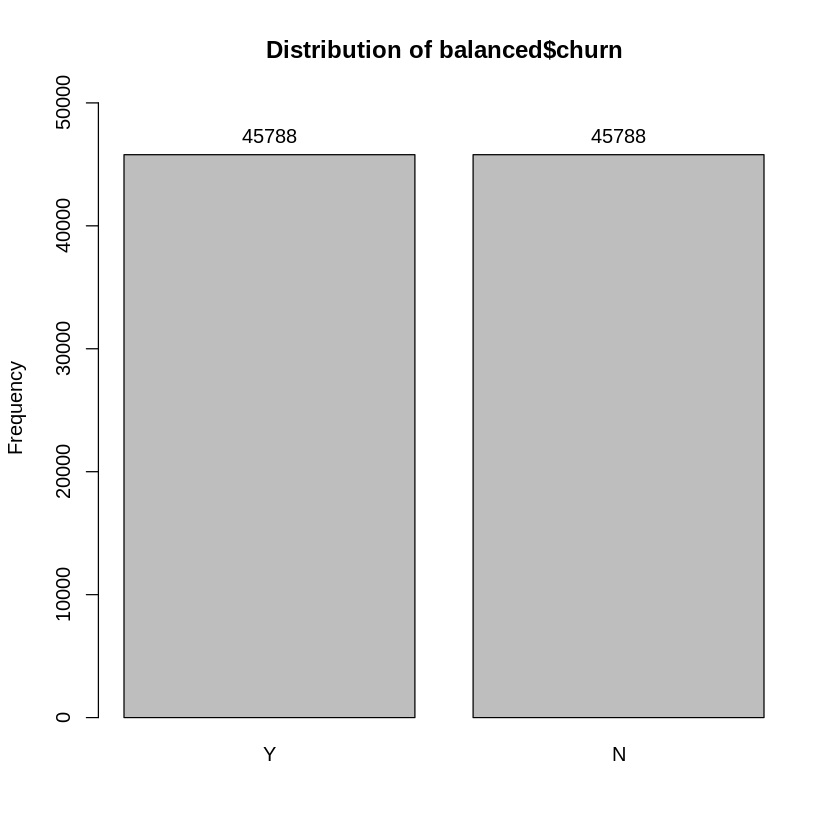

In [14]:
# Install and load required libraries
# install.packages(c("caret", "party", "naivebayes", "randomForest", "epiDisplay", "DMwR"))
# library(devtools)
# install_github("cran/DMwR")
library(caret)
library(party)
library(naivebayes)
library(randomForest)
library(epiDisplay)
library(DMwR)

# Read the clean data
Clean_Customer_Churn <- read.csv("/content/cleanchurnfinal.csv", stringsAsFactors = TRUE, sep = ",", na.strings = c("", "NA"))

# Logistic Regression
set.seed(2018)
train <- createDataPartition(Clean_Customer_Churn$churn, p = 0.7, list = FALSE)
training <- Clean_Customer_Churn[train, ]
testing <- Clean_Customer_Churn[-train, ]

Logistic_Model <- glm(churn ~ line_stat + bandwidth + complaint_cnt + with_phone_service + tenure_Cat + secured_revenue + ce_expiry + current_mth_churn, family = binomial(link = "logit"), data = training)
print(summary(Logistic_Model))

testing$churn <- as.character(testing$churn)
testing$churn[testing$churn == "N"] <- "0"
testing$churn[testing$churn == "Y"] <- "1"

fitted_results <- ifelse(predict(Logistic_Model, newdata = testing, type = "response") > 0.5, 1, 0)
misClasificError <- mean(fitted_results != as.numeric(testing$churn))
print(paste('Logistic Regression Model Accuracy is', 1 - misClasificError))

# Decision Tree
tree <- ctree(churn ~ with_phone_service + tenure_Cat + bandwidth, training)
plot(tree)

pred_DT <- predict(tree, testing)
print("The Confusion Matrix of Decision Tree is")
table(Predicted = pred_DT, Actual = testing$churn)

print(paste('The Decision Tree Accuracy is', sum(diag(table(Predicted = pred_DT, Actual = testing$churn))) / sum(table(Predicted = pred_DT, Actual = testing$churn))))

# Naive Bayes Model
ctrl <- trainControl(method = 'cv', number = 10, classProbs = TRUE, summaryFunction = twoClassSummary)
NB <- train(churn ~ line_stat + bandwidth + complaint_cnt + with_phone_service + tenure_Cat + secured_revenue + ce_expiry + current_mth_churn, data = training, method = "naive_bayes", trControl = ctrl, metric = "ROC")
NB_pred <- predict(NB, testing)
print("The Confusion Matrix of Naive Bayes is")
table(Predicted = NB_pred, Actual = testing$churn)

print(paste('The Naive Bayes Accuracy is', sum(diag(table(Predicted = NB_pred, Actual = testing$churn))) / sum(table(Predicted = NB_pred, Actual = testing$churn))))

# Random Forest
RF <- randomForest(churn ~ line_stat + bandwidth + complaint_cnt + with_phone_service + tenure_Cat + secured_revenue + ce_expiry + current_mth_churn, data = training)
print(RF)

pred_RF <- predict(RF, testing)
table(Predicted = pred_RF, Actual = testing$churn)
print(paste('The Random Forest Accuracy is', sum(diag(table(Predicted = pred_RF, Actual = testing$churn))) / sum(table(Predicted = pred_RF, Actual = testing$churn))))

# Random Forest Feature Importance
varImpPlot(RF, sort = TRUE, n.var = 5, main = 'Most important 5 Features')

# Balance the data using SMOTE
New_dataset <- Clean_Customer_Churn[1:100000, c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)]
balanced <- SMOTE(churn ~ ., New_dataset, perc.over = 100)

# Verification of balance
tab1(balanced$churn, sort.group = "decreasing", cum.percent = TRUE)

# Split the data into training2 and testing2 sets (70% to 30%)
balanced_train <- createDataPartition(balanced$churn, p = 0.7, list = FALSE)
set.seed(2018)
training2 <- balanced[balanced_train, ]
testing2 <- balanced[-balanced_train, ]

Logistic_Model2 <- glm(churn ~ line_stat + bandwidth + complaint_cnt + with_phone_service + tenure_Cat + secured_revenue + ce_expiry + current_mth_churn, family = binomial(link = "logit"), data = training2)
print(summary(Logistic_Model))

testing2$churn <- as.character(testing2$churn)
testing2$churn[testing2$churn == "N"] <- "0"
testing2$churn[testing2$churn == "Y"] <- "1"

fitted_results <- ifelse(predict(Logistic_Model, newdata = testing2, type = "response") > 0.5, 1, 0)
misClasificError <- mean(fitted_results != testing2$churn)
print(paste('Logistic Regression Model Accuracy after balance is', 1 - misClasificError))
